In [1]:
import pandas as pd
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pickle_in = open(os.path.join(os.getcwd(), 'data', 'processed', 'all_data.pickle'), 'rb')
data = pickle.load(pickle_in)

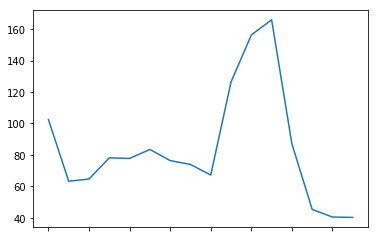

In [12]:
data['2000']['income'][data['2000']['income'].columns[1:]].mean(axis=0).plot()

In [14]:
income_scorer = np.array([5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5,
                          55, 67.5, 87.5, 112.5, 137.5, 175, 300])

In [18]:
x = data['2000']['income'].copy()
x['income_index'] = x[x.columns[1:]].dot(income_scorer)
x.head()

total   <10k  [10k-15k)  [15k-20k)  [20k-25k)  [25k-30k)  \
geoid                                                                    
48021950100  2577.0  219.0       75.0      154.0      227.0      142.0   
48021950200  2053.0  286.0      131.0      137.0      141.0      120.0   
48021950300  2755.0  168.0      106.0      198.0      143.0      131.0   
48021950400  2760.0  262.0      216.0      129.0      145.0      155.0   
48021950600  1720.0  192.0      137.0      139.0       87.0       84.0   

             [30k-35k)  [35k-40k)  [40k-45k)  [45k-50k)  [50k-60k)  [60k-75k)  \
geoid                                                                           
48021950100       89.0      155.0      174.0      172.0      297.0      326.0   
48021950200      108.0      160.0       71.0      100.0      252.0      236.0   
48021950300      218.0      167.0      167.0      160.0      253.0      447.0   
48021950400      172.0      183.0      138.0      119.0      200.0      440.0   
48021950600      126.0      157.0       92.0       86.0      120.0      191.0   

             [75k-100k)  [100k-125k)  [125k-150k)  [150k-200k)  >200k  \
geoid                                                                   
48021950100       343.0        133.0         19.0         28.0   24.0   
48021950200       181.0         30.0         22.0         40.0   38.0   
48021950300       267.0        198.0         46.0         55.0   31.0   
48021950400       326.0        131.0         69.0         35.0   40.0   
48021950600       160.0         80.0         18.0         38.0   13.0   

             income_index  
geoid                      
48021950100      136037.5  
48021950200       99642.5  
48021950300      155470.0  
48021950400      149337.5  
48021950600       82867.5

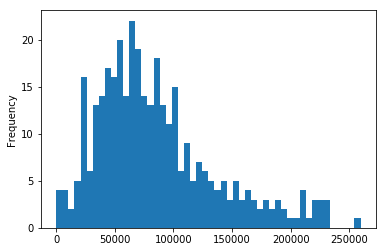

In [22]:
x['income_index'].plot(kind='hist', bins=50)

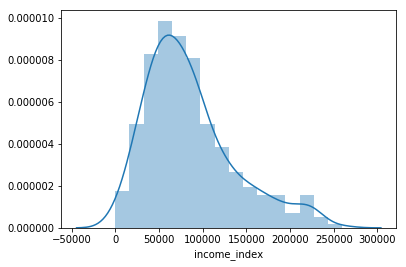

In [23]:
sns.distplot(x['income_index'])

In [24]:
print(x['income_index'].mean(), x['income_index'].median())

85407.52857142857 73386.25


In [25]:
x.head()

total   <10k  [10k-15k)  [15k-20k)  [20k-25k)  [25k-30k)  \
geoid                                                                    
48021950100  2577.0  219.0       75.0      154.0      227.0      142.0   
48021950200  2053.0  286.0      131.0      137.0      141.0      120.0   
48021950300  2755.0  168.0      106.0      198.0      143.0      131.0   
48021950400  2760.0  262.0      216.0      129.0      145.0      155.0   
48021950600  1720.0  192.0      137.0      139.0       87.0       84.0   

             [30k-35k)  [35k-40k)  [40k-45k)  [45k-50k)  [50k-60k)  [60k-75k)  \
geoid                                                                           
48021950100       89.0      155.0      174.0      172.0      297.0      326.0   
48021950200      108.0      160.0       71.0      100.0      252.0      236.0   
48021950300      218.0      167.0      167.0      160.0      253.0      447.0   
48021950400      172.0      183.0      138.0      119.0      200.0      440.0   
48021950600      126.0      157.0       92.0       86.0      120.0      191.0   

             [75k-100k)  [100k-125k)  [125k-150k)  [150k-200k)  >200k  \
geoid                                                                   
48021950100       343.0        133.0         19.0         28.0   24.0   
48021950200       181.0         30.0         22.0         40.0   38.0   
48021950300       267.0        198.0         46.0         55.0   31.0   
48021950400       326.0        131.0         69.0         35.0   40.0   
48021950600       160.0         80.0         18.0         38.0   13.0   

             income_index  
geoid                      
48021950100      136037.5  
48021950200       99642.5  
48021950300      155470.0  
48021950400      149337.5  
48021950600       82867.5

In [30]:
y = data['2016']['income'].copy()
y['income_index'] = y[y.columns[1:]].dot(income_scorer)
sns.distplot(y['income_index'])

In [31]:
print(y['income_index'].median())

148720.0


In [122]:
#read the pickled data
pickle_in = open(os.path.join(os.getcwd(), 'data', 'processed', 'all_data.pickle'), 'rb')
data = pickle.load(pickle_in)

#keep a copy of the original data just in case
data_orig = data.copy()

income_scorer = np.array([5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5,
                          55, 67.5, 87.5, 112.5, 137.5, 175, 300])
rent_scorer = np.array([50, 125, 175, 225, 275, 325, 375, 425, 475, 525, 575,
                        625, 675, 725, 775, 850, 950, 1125, 1375, 1750, 2500])
value_scorer = np.array([5, 12.5, 17.5, 22.5, 27.5, 32.5, 27.5, 45, 55, 65, 75, 
                         85, 95, 112.5, 137.5, 162.5, 187.5, 225, 275, 350, 450, 
                         625, 875, 1500])

for key, scorer in zip(['income', 'rent'], [income_scorer, rent_scorer, value_scorer]):
    median_ = []
    for year in data.keys():
        tmp = data[year][key].copy()
        tmp['index'] = tmp[tmp.columns[1:]].dot(scorer)
        median_.append(tmp['index'].median())
    plt.scatter([2000, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], median_, label=key)
    print('{}\n{}'.format(key, median_))
plt.legend()

income
[73386.25, 105038.75, 112463.75, 119733.75, 124746.25, 128653.75, 136915.0, 139856.25, 148720.0]
rent
[244775.0, 461462.5, 506600.0, 583775.0, 619400.0, 658325.0, 713587.5, 717312.5, 761100.0]


In [118]:
tmp[tmp['index']==0]

total  <10k  [10k-15k)  [15k-20k)  [20k-25k)  [25k-30k)  \
geoid                                                                  
48453001606      0     0          0          0          0          0   
48453002319      0     0          0          0          0          0   
48453980000      0     0          0          0          0          0   

             [30k-35k)  [35k-40k)  [40k-45k)  [45k-50k)  [50k-60k)  [60k-75k)  \
geoid                                                                           
48453001606          0          0          0          0          0          0   
48453002319          0          0          0          0          0          0   
48453980000          0          0          0          0          0          0   

             [75k-100k)  [100k-125k)  [125k-150k)  [150k-200k)  >200k  index  
geoid                                                                         
48453001606           0            0            0            0      0    0.0  
48453002319           0            0            0            0      0    0.0  
48453980000           0            0            0            0      0    0.0

In [125]:
x.T

geoid        48021950100  48021950200  48021950300  48021950400  48021950600  \
total             2577.0       2053.0       2755.0       2760.0       1720.0   
<10k               219.0        286.0        168.0        262.0        192.0   
[10k-15k)           75.0        131.0        106.0        216.0        137.0   
[15k-20k)          154.0        137.0        198.0        129.0        139.0   
[20k-25k)          227.0        141.0        143.0        145.0         87.0   
[25k-30k)          142.0        120.0        131.0        155.0         84.0   
[30k-35k)           89.0        108.0        218.0        172.0        126.0   
[35k-40k)          155.0        160.0        167.0        183.0        157.0   
[40k-45k)          174.0         71.0        167.0        138.0         92.0   
[45k-50k)          172.0        100.0        160.0        119.0         86.0   
[50k-60k)          297.0        252.0        253.0        200.0        120.0   
[60k-75k)          326.0        236.0        447.0        440.0        191.0   
[75k-100k)         343.0        181.0        267.0        326.0        160.0   
[100k-125k)        133.0         30.0        198.0        131.0         80.0   
[125k-150k)         19.0         22.0         46.0         69.0         18.0   
[150k-200k)         28.0         40.0         55.0         35.0         38.0   
>200k               24.0         38.0         31.0         40.0         13.0   

geoid        48021950700  48055960200  48055960300  48055960400  48055960500  \
total             1606.0       1124.0       1348.0       1241.0       1829.0   
<10k               263.0        194.0         72.0        194.0        153.0   
[10k-15k)          164.0        108.0         67.0        106.0        123.0   
[15k-20k)          116.0         79.0         81.0         98.0        120.0   
[20k-25k)           94.0         96.0        109.0         50.0        158.0   
[25k-30k)           83.0         56.0         90.0         88.0        167.0   
[30k-35k)           88.0        103.0         97.0         89.0        135.0   
[35k-40k)          115.0         60.0         63.0        125.0        135.0   
[40k-45k)           99.0         38.0         85.0        144.0        109.0   
[45k-50k)           81.0         62.0         69.0         70.0        106.0   
[50k-60k)          154.0        150.0        168.0        128.0        151.0   
[60k-75k)          104.0         71.0        203.0         59.0        158.0   
[75k-100k)         142.0         68.0        144.0         54.0        221.0   
[100k-125k)         62.0         21.0         82.0         33.0         40.0   
[125k-150k)         16.0          0.0         13.0          3.0         24.0   
[150k-200k)         19.0         13.0          0.0          0.0         19.0   
>200k                6.0          5.0          5.0          0.0         10.0   

geoid           ...       48491020804  48491020806  48491021504  48491021505  \
total           ...            1166.0        322.0        655.0        880.0   
<10k            ...               0.0          0.0          8.0         11.0   
[10k-15k)       ...               4.0          1.0         14.0         19.0   
[15k-20k)       ...               4.0          1.0         20.0         27.0   
[20k-25k)       ...              21.0          6.0         19.0         25.0   
[25k-30k)       ...               5.0          2.0         11.0         14.0   
[30k-35k)       ...               5.0          2.0         28.0         37.0   
[35k-40k)       ...              17.0          5.0         32.0         44.0   
[40k-45k)       ...              24.0          7.0         39.0         52.0   
[45k-50k)       ...              18.0          5.0         39.0         52.0   
[50k-60k)       ...              87.0         24.0        103.0        139.0   
[60k-75k)       ...             180.0         50.0        125.0        168.0   
[75k-100k)      ...             174.0         48.0        132.0        178.0  

In [51]:
data['2000']['income'].columns

Index(['total', '<10k', '[10k-15k)', '[15k-20k)', '[20k-25k)', '[25k-30k)',
       '[30k-35k)', '[35k-40k)', '[40k-45k)', '[45k-50k)', '[50k-60k)',
       '[60k-75k)', '[75k-100k)', '[100k-125k)', '[125k-150k)', '[150k-200k)',
       '>200k'],
      dtype='object')

In [65]:
x = data['2000']['income']

In [114]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
x[x.columns[1:]].plot(kind='box', ax=ax)

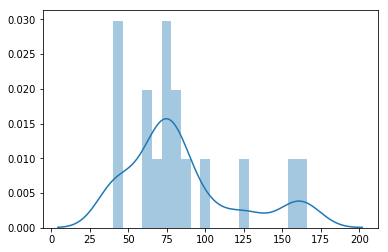

In [111]:
sns.distplot(x[x.columns[1:]].mean(), bins=20)

In [115]:
x

total    <10k  [10k-15k)  [15k-20k)  [20k-25k)  [25k-30k)  \
geoid                                                                     
48021950100  2577.0   219.0       75.0      154.0      227.0      142.0   
48021950200  2053.0   286.0      131.0      137.0      141.0      120.0   
48021950300  2755.0   168.0      106.0      198.0      143.0      131.0   
48021950400  2760.0   262.0      216.0      129.0      145.0      155.0   
48021950600  1720.0   192.0      137.0      139.0       87.0       84.0   
48021950700  1606.0   263.0      164.0      116.0       94.0       83.0   
48055960200  1124.0   194.0      108.0       79.0       96.0       56.0   
48055960300  1348.0    72.0       67.0       81.0      109.0       90.0   
48055960400  1241.0   194.0      106.0       98.0       50.0       88.0   
48055960500  1829.0   153.0      123.0      120.0      158.0      167.0   
48055960600   750.0    30.0       73.0       52.0       71.0       47.0   
48055960700  1979.0   357.0      129.0      162.0      258.0      158.0   
48209010100   867.0   100.0       92.0      105.0       51.0       60.0   
48209010200   644.0   179.0       79.0      106.0       47.0       16.0   
48209010302  1598.0   309.0      177.0      190.0       98.0      124.0   
48209010400  1594.0   202.0       60.0      134.0      130.0      116.0   
48209010500   912.0   123.0      129.0       37.0       91.0       78.0   
48209010600  2905.0   112.0      167.0       42.0      176.0      133.0   
48209010901  2173.0    27.0        9.0       23.0       17.0       46.0   
48209010902  1871.0    76.0       46.0       59.0       76.0       52.0   
48453000101  1746.0    70.0       62.0       58.0       62.0      155.0   
48453000102  1115.0    46.0       19.0       24.0       29.0       27.0   
48453000203   340.0   153.0       25.0        0.0       16.0       21.0   
48453000204  1665.0   172.0       88.0       66.0      167.0      171.0   
48453000302  2946.0   579.0      328.0      206.0      256.0      233.0   
48453000401  1763.0   290.0      196.0      113.0      174.0       60.0   
48453000402  1271.0   228.0      132.0       97.0      146.0      115.0   
48453000500  2715.0   618.0      328.0      271.0      300.0      175.0   
48453000601   298.0   120.0       39.0       40.0       17.0       41.0   
48453000603  2534.0  1312.0      332.0      250.0      178.0       82.0   
...             ...     ...        ...        ...        ...        ...   
48491020409  1210.0    45.0       28.0       22.0       28.0       92.0   
48491020410  2126.0    43.0       43.0       61.0       54.0       63.0   
48491020411  2074.0    42.0       41.0       59.0       53.0       61.0   
48491020505   583.0    13.0        2.0        5.0        8.0        3.0   
48491020506  1677.0    37.0        5.0       13.0       24.0       10.0   
48491020507   710.0    16.0        2.0        5.0       10.0        4.0   
48491020508   642.0     3.0       10.0       10.0        0.0       20.0   
48491020509  1000.0     4.0       16.0       15.0        1.0       31.0   
48491020510  1331.0     5.0       21.0       20.0        1.0       41.0   
48491020603  1040.0    22.0       24.0       29.0       29.0       28.0   
48491020604   568.0    12.0       13.0       16.0       16.0       15.0   
48491020605   780.0    16.0       18.0       22.0       22.0       21.0   
48491020706   499.0     2.0        0.0        2.0        7.0        0.0   
48491020707   576.0     2.0        0.0        2.0        9.0        0.0   
48491020708   929.0     3.0        0.0        3.0       14.0        0.0   
48491020803   361.0    15.0        9.0       17.0       16.0       16.0   
48491020805   584.0    24.0       14.0       27.0       26.0       25.0   
48491020807   614.0    25.0       15.0       29.0       27.0       27.0   
48491020808   132.0     5.0        3.0        6.0        6.0        6.0   
48491020809   526.0    21.0       13.0       25.0       23.0       23.0   
48491020804  1166.0     0.0        4.0 

In [93]:
df = pd.DataFrame(
[
[2, 4, 5, 6, 1],
[4, 5, 6, 7, 2],
[5, 4, 5, 5, 1],
[10, 4, 7, 8, 2],
[9, 3, 4, 6, 2],
[3, 3, 4, 4, 1]
], columns=['a1', 'a2', 'a3', 'a4', 'b'])

In [94]:
df.head()

a1  a2  a3  a4  b
0   2   4   5   6  1
1   4   5   6   7  2
2   5   4   5   5  1
3  10   4   7   8  2
4   9   3   4   6  2

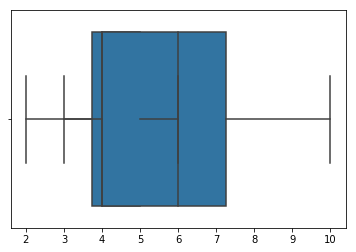

In [101]:
for i, grp in enumerate(df.filter(regex='a').groupby(by=df.b)):
    sns.boxplot(grp[1])

In [103]:
sns.factorplot?

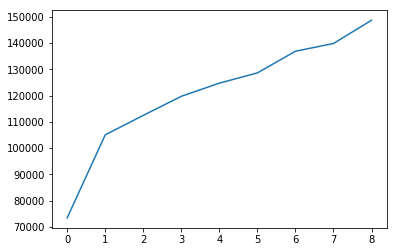

In [38]:
plt.plot(median_income)